# Logistic Regressions

We have an anonymized data set of about 200 users.  Each data point contains salary, years of experience as a data scientist, and whether she paid for a premium account as categorical variables.  We represent the dependent variables as either 0 or 1.  Our data is in a matrix where each row is a list.  Let's turn it into the format we need:

In [15]:
from collections import Counter
from functools import partial, reduce
from code_python3.linear_algebra import dot, vector_add
from code_python3.gradient_descent import maximize_stochastic, maximize_batch
from code_python3.working_with_data import rescale
from code_python3.machine_learning import train_test_split
from code_python3.multiple_regression import estimate_beta, predict
import math, random

data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = list(map(list, data)) # change tuples to lists

x = [[1] + row[:2] for row in data] # each element is [1, experience, salary]
y = [row[2] for row in data]        # each element is paid_account

print("x data:")
print(x)
print("y data:")
print(y)

x data:
[[1, 0.7, 48000], [1, 1.9, 48000], [1, 2.5, 60000], [1, 4.2, 63000], [1, 6, 76000], [1, 6.5, 69000], [1, 7.5, 76000], [1, 8.1, 88000], [1, 8.7, 83000], [1, 10, 83000], [1, 0.8, 43000], [1, 1.8, 60000], [1, 10, 79000], [1, 6.1, 76000], [1, 1.4, 50000], [1, 9.1, 92000], [1, 5.8, 75000], [1, 5.2, 69000], [1, 1, 56000], [1, 6, 67000], [1, 4.9, 74000], [1, 6.4, 63000], [1, 6.2, 82000], [1, 3.3, 58000], [1, 9.3, 90000], [1, 5.5, 57000], [1, 9.1, 102000], [1, 2.4, 54000], [1, 8.2, 65000], [1, 5.3, 82000], [1, 9.8, 107000], [1, 1.8, 64000], [1, 0.6, 46000], [1, 0.8, 48000], [1, 8.6, 84000], [1, 0.6, 45000], [1, 0.5, 30000], [1, 7.3, 89000], [1, 2.5, 48000], [1, 5.6, 76000], [1, 7.4, 77000], [1, 2.7, 56000], [1, 0.7, 48000], [1, 1.2, 42000], [1, 0.2, 32000], [1, 4.7, 56000], [1, 2.8, 44000], [1, 7.6, 78000], [1, 1.1, 63000], [1, 8, 79000], [1, 2.7, 56000], [1, 6, 52000], [1, 4.6, 56000], [1, 2.5, 51000], [1, 5.7, 71000], [1, 2.9, 65000], [1, 1.1, 33000], [1, 3, 62000], [1, 4, 71000], [1

A first attempt is to use linear regressino and find the best model:

$$ paid account = \beta_\alpha + \beta_1experience + \beta_2salary + \epsilon $$

So there's nothing that could stop us from modeling this way:

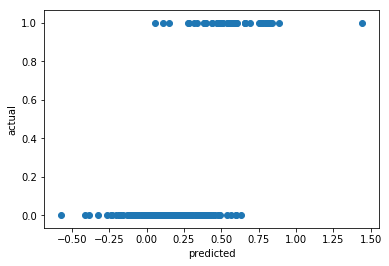

In [13]:
from matplotlib import pyplot as plt
rescaled_x = rescale(x)
beta = estimate_beta(rescaled_x, y)
predictions = [predict(x_i, beta) for x_i in rescaled_x]

plt.scatter(predictions, y)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

However, this approach leads to a couple of issues:

1. We'd like our output to be either 0 or 1 to indicate class membership.  It's fine if they are between 1 and 0 because we can interpret these as probabilities.  So an output of 0.25 could mean the member has a 25% chance of being a paid member.  But the outputs of the linear model can be huge positive numbers or even negative numbers, which it's not clear how to interpret.  Indeed, here a lot of our predictions were negative.
2. The linear regression model assumed that the errors were uncorrelated with the columns of `x`.  But here, the regresssion coefficient for `experience` is 0.43, indicating that more experience leads to a greater likelihood of a premium account.  This means that our model outputs very large values for people with lots of experience.  But we know that the actual values must be at most 1.  So large outputs correspond to very large negative values of the error term.  Because this is the case, our estimate of `beta` is biased.

What we'd like instead is for large positive values of `dot(x_i, beta)` to correspond to probabilities close to 1, and for large negative values to correspnod to probabilities close to 0.  We can accomplish this by applying another function to the result.

In the case of logistic regression, we use the *logistic function*:

In [16]:
def logistic(x):
    return 1.0 / (1 + math.exp(-x))

As its input gets large and positive, it gets closer and closer to 1.  As its input gets large and negative, it gets closer and closer to 0.  Additionally, it has the convenient property that its derivative is given by:

In [17]:
def logistic_prime(x):
    return logistic(x) * (1 - logistic(x))

Which we'll make use of shortly.  We'll use this to fit a model:

$$ y_i = f(x_i\beta) + \epsilon_i $$

where $ f $ is the `logistic()` function.  For linear regressions we fit the model by minimizing the sum of squared errors, which ended up choosing the $ \beta $ that maximized the likelihood of the data being accurate.  Here, the two aren't equivalent.  So, we'll use gradient descent to maximize the likelihood directly.  Given some $ \beta $, our model says that each $ y_i $ should equal 1 with probability $ f(x_i\beta) $ and 0 with probability $ 1 - f(x_i\beta) $.  In particular, the pdf for $ y_i $ can be written as:

$$ p(y_i|x_i, \beta) = f(x_i\beta)^y_i (1 - f(x_i\beta))^1-y_i $$

since if $ y_i $ is 0, this equals $ 1 - f(x_i\beta) $, and if $ y_i $ is 1, it equals $ f(x_i\beta) $.  It's actually simpler to maximize the *log likelihood*:

$$ log L(\beta|x_py_i) = y_i log f(x_i\beta) + (1 - y_i) log(1 - f(x_i\beta)) $$

Because log is strictly increasing function, any `beta` that maximizes the log likelihood also maximizes the likelihood and vice versa.

In [18]:
def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta)))

If we assume different data points are independent from one another, the overall likelihood is just the product of the individual likelihoods.  Which means the overall log likelihood is the sum of the individual log likelihoods:

In [19]:
def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
               for x_i, y_i in zip(x, y))

And the gradient:

In [20]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """here i is the index of the data point,
    j the index of the derivative"""

    return (y_i - logistic(dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    """the gradient of the log likelihood
    corresponding to the i-th data point"""

    return [logistic_log_partial_ij(x_i, y_i, beta, j)
            for j, _ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    return reduce(vector_add,
                  [logistic_log_gradient_i(x_i, y_i, beta)
                   for x_i, y_i in zip(x,y)])

We'll want to spolit our data into a training set and a test set:

In [21]:
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_x, y, 0.33)

# want to maximize log likelihood on the training data
fn = partial(logistic_log_likelihood, x_train, y_train)
gradient_fn = partial(logistic_log_gradient, x_train, y_train)

# pick a random starting point
beta_0 = [1, 1, 1]

# and maximize using gradient descent
beta_hat = maximize_batch(fn, gradient_fn, beta_0)
print("beta_batch", beta_hat)

beta_batch [-1.906182482651773, 4.053083869373743, -3.8788953691426906]


Alternatively, you could use stochastic gradient descent:

In [22]:
beta_0 = [1, 1, 1]
beta_hat = maximize_stochastic(logistic_log_likelihood_i,
                               logistic_log_gradient_i,
                               x_train, y_train, beta_0)

print("beta stochastic", beta_hat)

beta stochastic [-1.9033596650613738, 4.048485018705759, -3.8747571420402442]


These are coefficients for the `rescaled()` data, but we can transform them back to the original data as well:

```python
beta_hat_unscaled = [7.61, 1.42, -0.000249]
```

These are not as easy to interpret as linear regression coefficients.  All else being equal, an extra year of experience adds 1.42 to the input of `logistic()`.  All else being equal, and extra $10,000 of salary subtracts 2.49 from the input of `logistic()`.  The impact on the output depends on the other inputs as well.  If `dot(beta, x_i) is already large (corresponding to a probability close to 1), increasing it even by a lot cannot affect the probability very much.  If it's close to 0, increasing it just a little might increase the probability quite a bit.

What we can say is that all else being equal, people with more experience are more likely to pay for their accounts, and that people with higher salaries are less likely to pay for accounts.  We haven't used the test data that we held out.  Let's see what happens if we predict *paid account* whenever the probability exceeds 0.5:

In [24]:
true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(x_test, y_test):
    predict = logistic(dot(beta_hat, x_i))

    if y_i == 1 and predict >= 0.5:  # TP: paid and we predict paid
        true_positives += 1
    elif y_i == 1:                   # FN: paid and we predict unpaid
        false_negatives += 1
    elif predict >= 0.5:             # FP: unpaid and we predict paid
        false_positives += 1
    else:                            # TN: unpaid and we predict unpaid
        true_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print("precision: {0}".format(precision))
print("recall: {0}".format(recall))

precision: 0.9333333333333333
recall: 0.8235294117647058


This tells us that when we predict *paid account* we are right 93% of the time, and when a user has a paid account we predict *paid account* 82% of the time.  We can also plot the predictions versus the actual, which also shows that the model performs well:

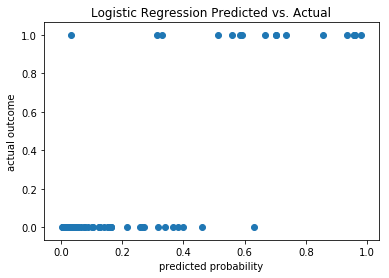

In [25]:
predictions = [logistic(dot(beta_hat, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test)
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()